In [1]:
#Installing, tensor flow- From google and  from facebook pytorch- This is used for designing, training, and deploying deep learning models, especially neural networks.
!pip install tensorflow


In [2]:
#Print the version
import tensorflow as tf
print(tf.__version__)

2.15.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
#Read the csv fileinto dataset
#you can get the data from here https://www.kaggle.com/account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fshrutimechlearn%2Fchurn-modelling%2Fversions%2F1%3Fresource%3Ddownload
#Put this at left hand side so that we can access
dataset=pd.read_csv('Churn_Modelling.csv')

# New Section

In [5]:
#Print the dataset
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:

#Create dependent and indepened featurtes
x=dataset.iloc[:,3:13] #Ignoring rownumber, customerid,surname
y=dataset.iloc[:,13]

In [9]:
x #Printing the value

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [8]:
#Feature enginnering
Geography=pd.get_dummies(x['Geography'],drop_first=True) #Geogray has categorical value converting into 0-1 and we have 3 category so we are dropping first suppose if that both 00 it means that is third


In [10]:
Geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [11]:
gender=pd.get_dummies(x['Gender'],drop_first=True) #Same thing for gender

In [12]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [13]:
x=x.drop(['Geography','Gender'],axis=1) #Now removing categorical geograph and gender column from x

In [14]:
x.head() #print the value

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [15]:
#Add Geography and Gender column wise to x variable
x=pd.concat([x,Geography,gender],axis=1)


In [16]:
x


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [17]:
#here am create test and train data- test size-0.2 means 20% for test side
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [18]:
#Standarazing - Scalling- Giving values into one range for all
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(X1_train)
y_train=sc.fit_transform(X1_test)

In [19]:
#print x_train
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [20]:
#check shape
x_train.shape

(8000, 11)

In [21]:
#NOW ANN Work start- lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import LeakyReLU
from keras.layers import PReLU
from keras.layers import ReLU
from keras.layers import ELU
from tensorflow.keras.layers import Dropout


In [22]:
#Initialize the ANN
classifier=Sequential()

In [23]:
#Now add input layer and what activation function we need to use in next layer
classifier.add(Dense(units=11,activation='relu'))
#11 input layers because we have 11 inputs and relu activation method in next layer

In [24]:
#ADd first hidden layer with 7 neurons
classifier.add(Dense(units=7,activation='relu')) #There are no strict rules that how many hidden layes i need

#Overfitting vs. Underfitting:

#Using too many layers/neurons can lead to overfitting, especially if you don't have a massive dataset. Overfit models perform very well on training data but poorly on unseen data.
#Using too few layers/neurons can lead to underfitting, where the model doesn't perform well on either the training or test data.

In [26]:
#ADd second hidden layer with 6 neurons
classifier.add(Dense(units=6,activation='relu'))

In [27]:
#Add output layer- Using sigmoid because this is binary classfication problem
classifier.add(Dense(1,activation='sigmoid'))


In [28]:
#Complie the neural network- Adam is optmizer and binary cross entropy because of binary classfication problem
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#this code is if you are using optimizer and want to update the learning rate then create code like this and
#put opt at above code insplace of adam - 4:10:49-https://www.youtube.com/watch?v=d2kxUVwWWwU&t=15148s
#Setting learning rate- it is already 0.01 but if you want to change you can do
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [30]:
#In above code we dont know how many epcohs we need to put so i will use method which help me to stop when accurancy is not improving and that early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

#monitor="val_loss":
#This specifies which metric to monitor for the early stopping. In this case, it's monitoring the validation loss (val_loss). Training will stop when this metric stops improving (based on the other parameters defined).

#min_delta=0.0001:
# If the change between epochs is smaller than this value, it's not considered an improvement

#patience=20:
#This is the number of epochs with no improvement to wait before stopping the training. For instance, if the val_loss doesn't improve for 20 consecutive epochs, the training will stop.

#verbose=1:
#A value of 1 means it will print messages indicating when early stopping is triggered.

#mode="auto":
#This defines how to interpret the min_delta value for improvement. The "auto" mode means it will decide to look for increasing or decreasing values of the monitored metric based on its name (e.g., "loss" should decrease, while "accuracy" should increase).

#baseline=None:
#This is an optional value. If provided, training will stop if the model doesn't achieve a metric better than this baseline.

#restore_best_weights=False:
#If set to True, the model weights will be restored to the state with the best value of the monitored metric. If set to False, the model weights obtained at the last step of training are used.

#start_from_epoch=0:
#This is an advanced parameter, typically used for resuming training. It tells the callback from which epoch it should start monitoring the metric. In this case, it starts from the very first epoch.

In [31]:
#now pass early stopping here and it will stop when model not improving
model_history=classifier.fit(x_train,y1_train,validation_split=0.3,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
560/560 [==============================] - 2s 4ms/step - loss: 0.3105 - accuracy: 0.8752 - val_loss: 0.3668 - val_accuracy: 0.8517
Epoch 2/1000
560/560 [==============================] - 2s 4ms/step - loss: 0.3101 - accuracy: 0.8743 - val_loss: 0.3641 - val_accuracy: 0.8471
Epoch 3/1000
560/560 [==============================] - 2s 4ms/step - loss: 0.3114 - accuracy: 0.8754 - val_loss: 0.3677 - val_accuracy: 0.8492
Epoch 4/1000
560/560 [==============================] - 3s 6ms/step - loss: 0.3081 - accuracy: 0.8748 - val_loss: 0.3713 - val_accuracy: 0.8462
Epoch 5/1000
560/560 [==============================] - 2s 4ms/step - loss: 0.3086 - accuracy: 0.8730 - val_loss: 0.3716 - val_accuracy: 0.8504
Epoch 6/1000
560/560 [==============================] - 2s 4ms/step - loss: 0.3089 - accuracy: 0.8755 - val_loss: 0.3659 - val_accuracy: 0.8521
Epoch 7/1000
560/560 [==============================] - 2s 4ms/step - loss: 0.3094 - accuracy: 0.8723 - val_loss: 0.3700 - val_accuracy:

In [32]:
#check the keys availbale
model_history.history.keys()
#These keys represent the metrics that were tracked during training, such as training loss, validation loss, training accuracy, and validation accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

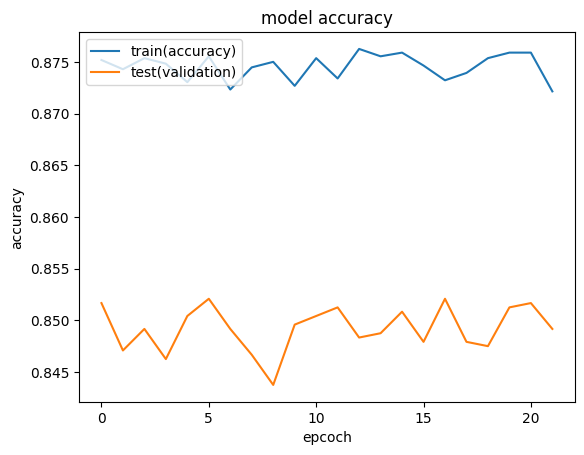

In [33]:
#Summarize history for accuracy
plt.plot(model_history.history['accuracy']) #Training accuracy is the measure of a model's performance on the training dataset. It quantifies how well the model predicts the outcomes for the data it was trained on. After each epoch (or iteration) in the training process, the model makes predictions on the training dataset, and these predictions are compared to the actual outcomes. The ratio of correct predictions to the total number of predictions gives the training accuracy.
plt.plot(model_history.history['val_accuracy'])#This accuracy is needed to check what will happen if we give new data, that is why we have validation data set where we check for given test data we have accuracy but we also check if we give unseen data(valdiation data set) then is the prediction, this is required to know, what will be accuracy for unseen data
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epcoch')
plt.legend(['train(accuracy)','test(validation)'],loc='upper left')
plt.show()


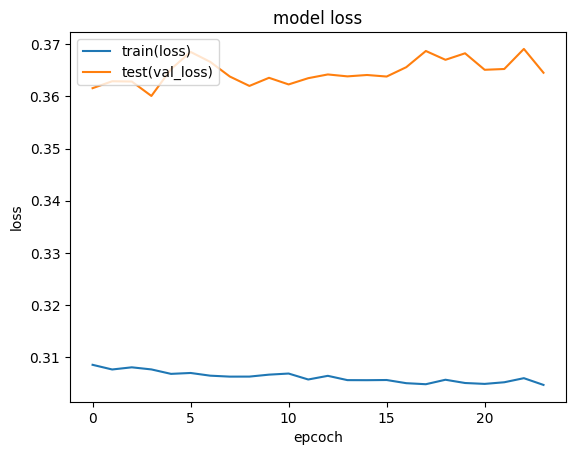

In [ ]:
#Summarize history for accuracy
#Same for training accuracy for how many correct in trianing data, training losss how many errors
#same for validation accuracy how many correct in unseen data, validaiton loss how many errors
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epcoch')
plt.legend(['train(loss)','test(val_loss)'],loc='upper left')
plt.show()


In [ ]:
#now predict the data

y_pred=classifier.predict(X1_test)

63/63 [==============================] - 0s 2ms/step


In [ ]:
y_pred #it is giving output in 0. and we need o or 1 then check below code

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
y_pred=(y_pred>=0.5) #it means value more than 0.5 true and less than false

In [ ]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#show confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y1_test,y_pred)
cm

array([[1595,    0],
       [ 405,    0]])

In [ ]:
#show confusion matrix
from sklearn.metrics import accuracy_score
score=accuracy_score(y1_test,y_pred)
score

0.7975